<a href="https://colab.research.google.com/github/kiminlim/ds-section1-sprint2/blob/master/n123-confidence-intervals/n123a-confidence-intervals.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img src='https://i.imgur.com/RDAD11M.png' width = '200' align = 'right'>

## *DATA SCIENCE / SECTION 1 / SPRINT 2 / NOTE 3*

# 📝 Assignment

# 신뢰구간

서울시 기간별 시간평균 대기환경 정보 데이터셋을 이용합니다.

<img src='https://user-images.githubusercontent.com/6457691/89852263-740add80-dbc9-11ea-9e6b-8059b3f7e479.png'>

<https://data.seoul.go.kr/dataList/OA-2221/S/1/datasetView.do>

### `2020년 3월`의 송파구 데이터만 사용합니다.



## 1. 데이터셋을 불러오세요

  - 데이터는 `df`라는 변수에 저장되어야 하며
  - Feature로는 `측정일시`, `측정소명`, `오존(ppm)` 만 사용합니다.

In [95]:
import pandas as pd
import numpy as np

In [96]:
data = pd.read_csv('/content/서울시_기간별_시간평균_대기환경_정보_2020.03.csv', encoding='cp949')
data.head()

,측정일시,권역코드,권역명,측정소코드,측정소명,미세먼지 1시간(㎍/㎥),미세먼지 24시간(㎍/㎥),초미세먼지(㎍/㎥),오존(ppm),이산화질소농도(ppm),일산화탄소농도(ppm),아황산가스농도(ppm)
0,202003312300,100,도심권,111123,종로구,47,48,22,0.036,0.018,0.4,0.004
1,202003312300,100,도심권,111131,용산구,55,52,21,0.024,0.033,0.5,0.003
2,202003312300,100,도심권,111121,중구,43,43,24,0.034,0.020,0.4,0.003
3,202003312300,101,서북권,111181,은평구,51,54,18,0.047,0.010,0.3,0.003
4,202003312300,101,서북권,111191,서대문구,58,57,21,0.047,0.012,0.6,0.003


In [97]:
df = data[['측정일시', '측정소명', '오존(ppm)']]

In [98]:
df = df[df['측정소명'] == '송파구']
df.shape

(744, 3)

## 2. 데이터셋으로 부터 2개의 샘플을 생성하세요.

- `s1`에 저장된 1개는 20개의 데이터, `s2`에 저장된 다른 1개는 200개이며 
- 두 경우 모두 `random_state`로 `42`를 설정합니다.

In [99]:
np.random.seed(42)

rnd_indices = np.random.choice(df.index, size=20, replace = False)
s1 = or_data = df.loc[rnd_indices,:]
print(s1.shape)

np.random.seed(42)
rnd_indices = np.random.choice(df.index, size=200, replace = False)
s2 = or_data = df.loc[rnd_indices,:]
print(s2.shape)

(20, 3)
(200, 3)


In [100]:
s1

,측정일시,측정소명,오존(ppm)
15249,202003061400,송파구,0.021
13499,202003091200,송파구,0.020
17372,202003030100,송파구,0.002
8774,202003170900,송파구,0.009
4372,202003241700,송파구,0.044
2048,202003281400,송파구,0.037
8899,202003170400,송파구,0.021
10624,202003140700,송파구,0.019
13098,202003100400,송파구,0.013
15447,202003060600,송파구,0.002


## 3. 두 샘플데이터에 대해서 `오존(ppm)`항목의 표본 평균을 계산하세요.

In [101]:
s1['오존(ppm)'].mean()

0.021750000000000002

In [102]:
s2['오존(ppm)'].mean()

0.02291999999999995

In [103]:
pop_mean = df['오존(ppm)'].mean()
pop_mean

0.023588709677419318

## 4. 위에서 추정한 값들을 바탕으로, 95%에 해당하는 신뢰구간을 `CI1과` `CI2`에 계산하세요.

  - `ddof`는 `1`을 사용합니다.

In [104]:
# s1(n = 20)
from scipy.stats import t

# 표본의 크기
n = len(s1)
# 자유도
dof = n-1
# 평균의 평균
s1_mean = np.mean(s1['오존(ppm)'])
# 표본의 표준편차
sample_std = np.std(s1['오존(ppm)'], ddof = 1)
# 표준 오차
std_err = sample_std / n ** 0.5 # sample_std / sqrt(n)

CI1 = t.interval(.95, dof, loc = s1_mean, scale = std_err) # https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.t.html
print("95% 신뢰구간: ", CI1)

95% 신뢰구간:  (0.015060460813957323, 0.02843953918604268)


In [105]:
# s2(n = 200)
from scipy.stats import t

# 표본의 크기
n = len(s2)
# 자유도
dof = n-1
# 평균의 평균
s2_mean = np.mean(s2['오존(ppm)'])
# 표본의 표준편차
sample_std = np.std(s2['오존(ppm)'], ddof = 1)
# 표준 오차
std_err = sample_std / n ** 0.5 # sample_std / sqrt(n)

CI2 = t.interval(.95, dof, loc = s2_mean, scale = std_err) # https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.t.html
print("95% 신뢰구간: ", CI2)

95% 신뢰구간:  (0.021006515262626202, 0.0248334847373737)


## 5. `plt.bar`를 사용하여 다음과 같은 신뢰구간 시각화를 그리세요.
  - 이때 보라색 선에 해당 하는 값을 `pop_mean`에 저장하세요.
  - `colors = '#4000c7'`을 사용하세요.

<img src='https://i.imgur.com/3orh30m.png'>






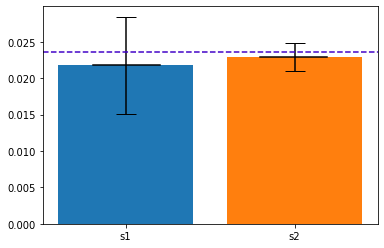

In [106]:
import matplotlib.pyplot as plt # yerr과 capsize를 이용하면 신뢰구간 표현가능

plt.bar(x = 's1', height = s1_mean, yerr = CI1[1]-s1_mean, capsize = 10)
plt.bar(x = 's2', height = s2_mean, yerr = CI2[1]-s2_mean, capsize = 10)
plt.axhline(pop_mean, linestyle = '--', color = '#4000c7')
plt.axhline(s1_mean, color = 'black', xmin = 0.15, xmax = 0.35)
plt.axhline(s2_mean, color = 'black', xmin = 0.65, xmax = 0.85)
#axvline은 수직선을 그려줌

In [107]:
s1['오존(ppm)'][9199]

0.033

In [109]:
s2['오존(ppm)'][4372]

0.044000000000000004

In [111]:
CI1[0]

0.015060460813957323

In [112]:
CI2[1]

0.0248334847373737

# 🔥 도전과제
> 아래 두 문제를 모두 다 하시면 됩니다.

## 1. [plotly](https://plotly.com/) 나 [seaborn](http://seaborn.pydata.org/index.html), [bokeh](https://docs.bokeh.org/en/latest/index.html) 등 다른 시각화 라이브러리를 선택하여 앞에서 그렸던 신뢰구간을 해당 라이브러리를 선택하여 그려보세요.

In [114]:
#seaborn 이용

import seaborn as sns

sea1 = s1[['오존(ppm)']]
sea1['sample'] = 's1'

sea2 = s2[['오존(ppm)']]
sea2['sample'] = 's2'

sea =  pd.concat([sea1, sea2])



/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 50724 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51316 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 50724 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 51316 missing from current font.
  font.set_text(s, 0, flags=flags)


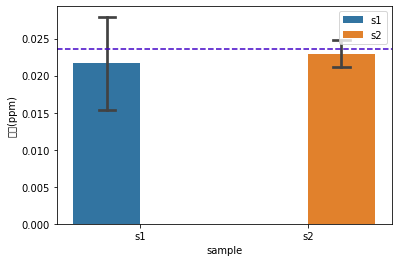

In [115]:
sns.barplot(
    x = 'sample',
    y = '오존(ppm)',
    data = sea,
    hue = 'sample',
    ci = 95,
    capsize = .1)

plt.axhline(pop_mean, linestyle = '--', color = '#4000c7')

plt.legend(loc = 'upper right')
plt.show()


## 2. 위 데이터의 `초미세먼지` 데이터를 사용하여, 큰 수의 법칙과, 중심극한가설을 표현하는 코드를 작성하세요.

In [119]:
df1 = data[['측정소명', '초미세먼지(㎍/㎥)']]
df1 = df1[df1['측정소명'] == '송파구']
df1


,측정소명,초미세먼지(㎍/㎥)
24,송파구,23
49,송파구,19
73,송파구,17
99,송파구,18
124,송파구,22
...,...,...
18499,송파구,21
18524,송파구,20
18547,송파구,21
18573,송파구,20


큰수의 법칙

In [122]:
df1['초미세먼지(㎍/㎥)'].var()

158.134611210003

In [123]:
np.random.choice(df1['초미세먼지(㎍/㎥)'], 5).var()

87.6

In [124]:
np.random.choice(df1['초미세먼지(㎍/㎥)'], 15).var()


94.82666666666667

In [125]:
np.random.choice(df1['초미세먼지(㎍/㎥)'], 50).var()

158.25639999999999

In [126]:
np.random.choice(df1['초미세먼지(㎍/㎥)'], 100).var()

135.2979

In [127]:
np.random.choice(df1['초미세먼지(㎍/㎥)'], 200).var()

160.60697499999998

In [128]:
np.random.choice(df1['초미세먼지(㎍/㎥)'], 500).var()

153.00468399999997

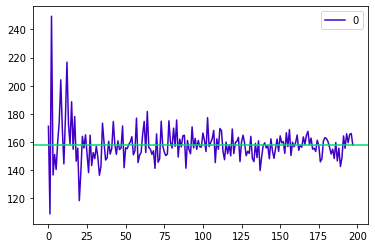

In [135]:
dat = []

for i in np.arange(start = 5, stop = 995, step = 5) :
  s = np.random.choice(df1['초미세먼지(㎍/㎥)'], i)
  dat.append(s.var())
dat

(pd
 .DataFrame(dat)
 .plot
 .line(color = '#4000c7')
 .axhline(y = 158.134611210003, color = '#00da75')
 );


In [132]:
df1['초미세먼지(㎍/㎥)'].mean()

23.862903225806452

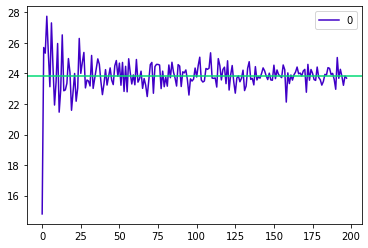

In [134]:
# 평균
dat = []

for i in np.arange(start = 5, stop = 995, step = 5) :
  s = np.random.choice(df1['초미세먼지(㎍/㎥)'], i)
  dat.append(s.mean())
dat

(pd
 .DataFrame(dat)
 .plot
 .line(color = '#4000c7')
 .axhline(y = 23.862903225806452, color = '#00da75')
 );

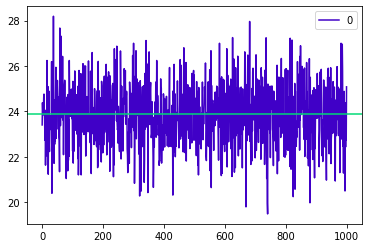

In [139]:
sample_means = []

for x in range(0, 1000):
  coinflips =np.random.choice(df1['초미세먼지(㎍/㎥)'], size = 100) # binomial distribution
  sample_means.append(coinflips.mean())

pd.DataFrame(sample_means).plot(color = '#4000c7')
plt.axhline(y = 23.862903225806452, color = '#00da75');

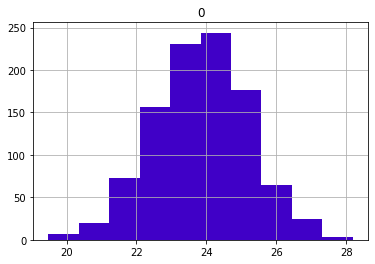

In [140]:
pd.DataFrame(sample_means).hist(color = '#4000c7');

In [141]:
sample_means_small = []
sample_means_medium = []
sample_means_large = []

for x in range(0, 3000):
  coinflips_small =np.random.choice(df1['초미세먼지(㎍/㎥)'], size = 10)
  coinflips_medium = np.random.choice(df1['초미세먼지(㎍/㎥)'], size = 50)
  coinflips_large = np.random.choice(df1['초미세먼지(㎍/㎥)'],  size = 200)
  sample_means_small.append(coinflips_small.mean())
  sample_means_medium.append(coinflips_medium.mean())
  sample_means_large.append(coinflips_large.mean())

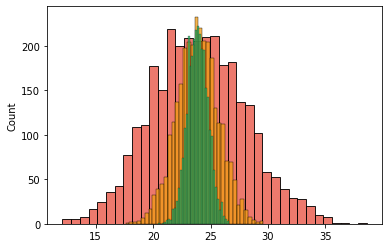

In [142]:
import seaborn as sns
ax = plt.subplots()

sns.histplot(sample_means_small, color = '#e74c3c')

sns.histplot(sample_means_medium, color = '#f39c12')

sns.histplot(sample_means_large, color = '#27ae60');
  
# sample_means_small -> red 
# sample_means_medium -> orange
# sample_means_large -> green